In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

In [8]:
stock_symbol = "RELIANCE.NS"

In [9]:
today = datetime.now().date()
start_date = today - timedelta(days=1)  # Adjust based on market opening days
end_date = today + timedelta(days=1)  # Adjust to ensure today's data is included

In [10]:
data = yf.download(stock_symbol, start=start_date, end=end_date, interval="1m")  # '1m' for minute-level data

[*********************100%%**********************]  1 of 1 completed


In [11]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-03-06 09:15:00+05:30,2990.800049,2996.500000,2989.000000,2996.500000,2996.500000,0
2024-03-06 09:16:00+05:30,2996.250000,3005.399902,2996.250000,3003.949951,3003.949951,83105
2024-03-06 09:17:00+05:30,3004.050049,3005.800049,3003.550049,3003.850098,3003.850098,32315
2024-03-06 09:18:00+05:30,3005.000000,3012.000000,3004.250000,3009.949951,3009.949951,44491
2024-03-06 09:19:00+05:30,3010.000000,3014.949951,3009.949951,3014.449951,3014.449951,35423
...,...,...,...,...,...,...
2024-03-06 15:25:00+05:30,3008.600098,3008.600098,3007.399902,3007.550049,3007.550049,27647
2024-03-06 15:26:00+05:30,3007.550049,3008.000000,3007.000000,3007.449951,3007.449951,17494
2024-03-06 15:27:00+05:30,3007.399902,3007.399902,3003.949951,3003.949951,3003.949951,14776


# Plotting the stock price

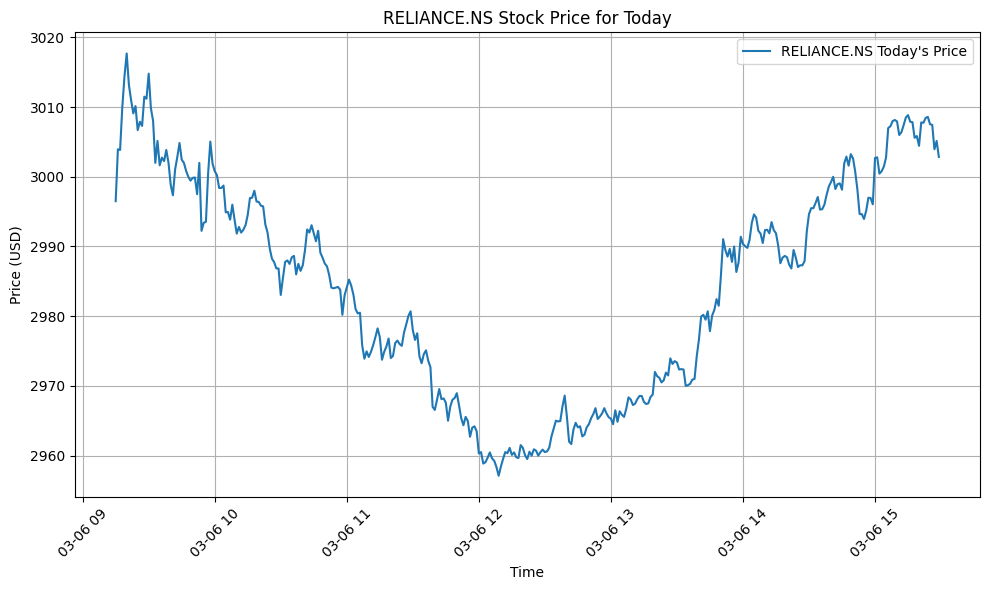

In [12]:
# Plot today's price
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label=f'{stock_symbol} Today\'s Price')
plt.title(f'{stock_symbol} Stock Price for Today')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()

# RSI Indicator

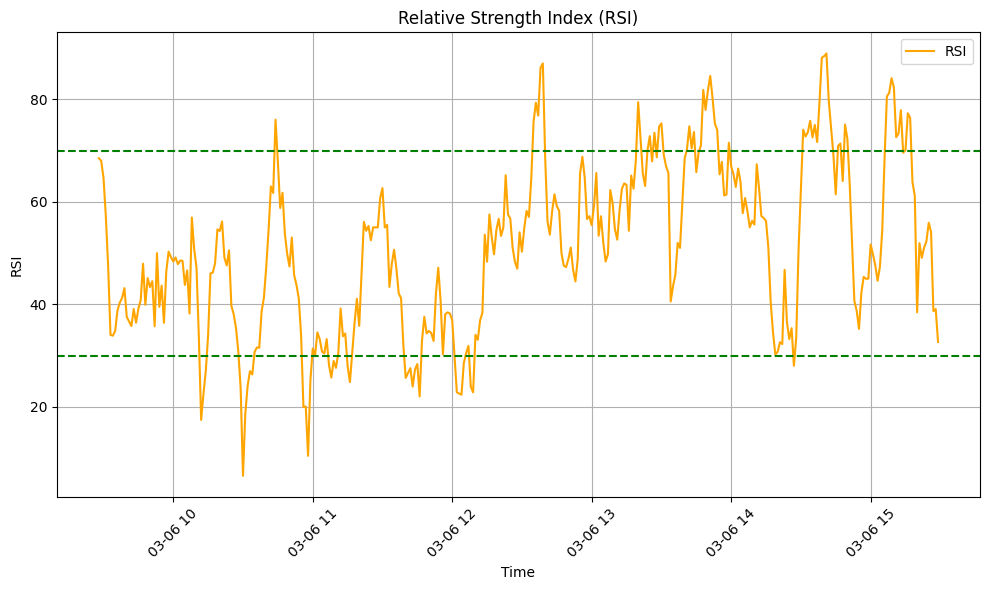

In [14]:
def rsi_indicator(data, period=14):
    """
    Calculate Relative Strength Index (RSI) for given data.
    """
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI
data['RSI'] = rsi_indicator(data)

# Plot RSI
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['RSI'], label='RSI', color='orange')
plt.title('Relative Strength Index (RSI)')
plt.axhline(30, linestyle='--', color='green')  # Under-sold line
plt.axhline(70, linestyle='--', color='green')  # Over-sold line
plt.xlabel('Time')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()

In [18]:
# Fetch data
stock = yf.Ticker(stock_symbol)

# Get the current price
current_price = stock.info['currentPrice']

# Print the current price
print(f"The current price of {stock_symbol} is: ${current_price}")

The current price of RELIANCE.NS is: $3006.0


In [29]:
import time
# Function to calculate RSI
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.clip(lower=0)).fillna(0)
    loss = (-delta.clip(upper=0)).fillna(0)

    avg_gain = gain.rolling(window, min_periods=1).mean()
    avg_loss = loss.rolling(window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to interpret RSI for buy or sell signals
def interpret_rsi(rsi_series):
    signals = []
    for value in rsi_series:
        if value > 70:
            signals.append('Sell')  # Overbought condition
        elif value < 30:
            signals.append('Buy')   # Oversold condition
        else:
            signals.append('Hold')
    return signals

def rsi_alert(stock_symbol):
    print("Fetching data for", stock_symbol)
    while True:
        stock_data = yf.download(stock_symbol, period='1d', interval='1m')
    
        # Ensure data was fetched
        if not stock_data.empty:
            # Calculate RSI
            stock_data['RSI'] = compute_rsi(stock_data['Close'])
    
            # Interpret RSI signals
            stock_data['RSI_Signal'] = interpret_rsi(stock_data['RSI'])
    
            # Display the latest part of the data frame
            
            # if stock_data['RSI_Signal'][-1] == 'Hold':
            #     pass
            # else:
            print(stock_data['RSI_Signal'][-1])  # Adjust as needed
        else:
            print(f"No data fetched for {stock_symbol}")
            return
        time.sleep(60)  # Wait for 1 minute before fetching the next data

In [30]:
rsi_alert('RELIANCE.NS')

Fetching data for RELIANCE.NS


[*********************100%%**********************]  1 of 1 completed


KeyboardInterrupt: 

In [31]:
top_by_volume = pd.read_csv('top_by_volume.csv')
top_by_volume

,SYMBOL \n,OPEN \n,HIGH \n,LOW \n,PREV. CLOSE \n,LTP \n,%CHNG \n,VOLUME \n(Shares),VALUE,CA \n
0,MOTHERSON,123.80,123.80,117.85,125.45,120.65,-3.83,"46,33,23,045","56,12,23,20,440.85",11-Aug-2023
1,IDEA,14.35,14.40,13.80,14.35,14.15,-1.39,"38,07,43,524","5,35,32,53,947.44",07-Jul-2023
2,YESBANK,24.50,24.50,23.50,24.50,23.60,-3.67,"31,06,25,402","7,39,59,90,821.62",03-Jun-2019
3,NHPC,93.60,95.50,90.80,92.45,91.50,-1.03,"12,01,74,834","11,11,73,73,893.34",22-Feb-2024
4,ZOMATO,164.40,164.40,157.50,165.85,161.70,-2.50,"9,56,21,548","15,39,50,69,228.00",NaN
5,INFIBEAM,37.20,38.90,36.55,37.05,37.80,2.02,"9,08,08,921","3,44,07,50,016.69",18-Sep-2023
6,JMFINANCIL,78.95,87.15,76.40,95.45,85.50,-10.42,"8,88,01,484","7,21,60,08,589.84",19-May-2023
7,PNB,129.60,130.70,125.60,129.70,130.30,0.46,"8,29,89,654","10,69,57,06,607.52",23-Jun-2023
8,BHEL,270.70,272.00,249.60,265.80,255.05,-4.04,"8,18,12,288","21,01,75,76,787.20",11-Aug-2023
9,GTLINFRA,1.85,1.90,1.80,1.90,1.80,-5.26,"6,76,73,573","12,24,89,167.13",21-Sep-2015


In [37]:
top_by_volume['SYMBOL \n']

0      MOTHERSON
1           IDEA
2        YESBANK
3           NHPC
4         ZOMATO
5       INFIBEAM
6     JMFINANCIL
7            PNB
8           BHEL
9       GTLINFRA
10          SAIL
11        JIOFIN
12           BCG
13      MAHABANK
14     TATASTEEL
15     SOUTHBANK
16    IDFCFIRSTB
17    JPASSOCIAT
18     IBREALEST
19        DISHTV
Name: SYMBOL \n, dtype: object